In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df['Age'].isnull().values.sum()
#177

177

In [120]:
df['Age'].fillna(df['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

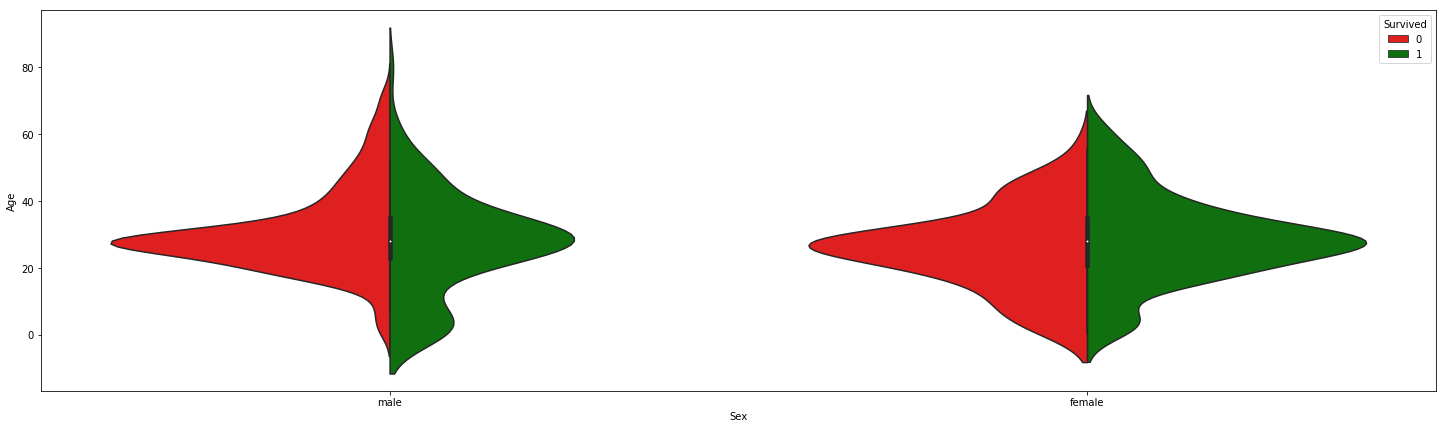

In [121]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: "r", 1: "g"})

#mortality rate of men in the age group 20-40 is more.  

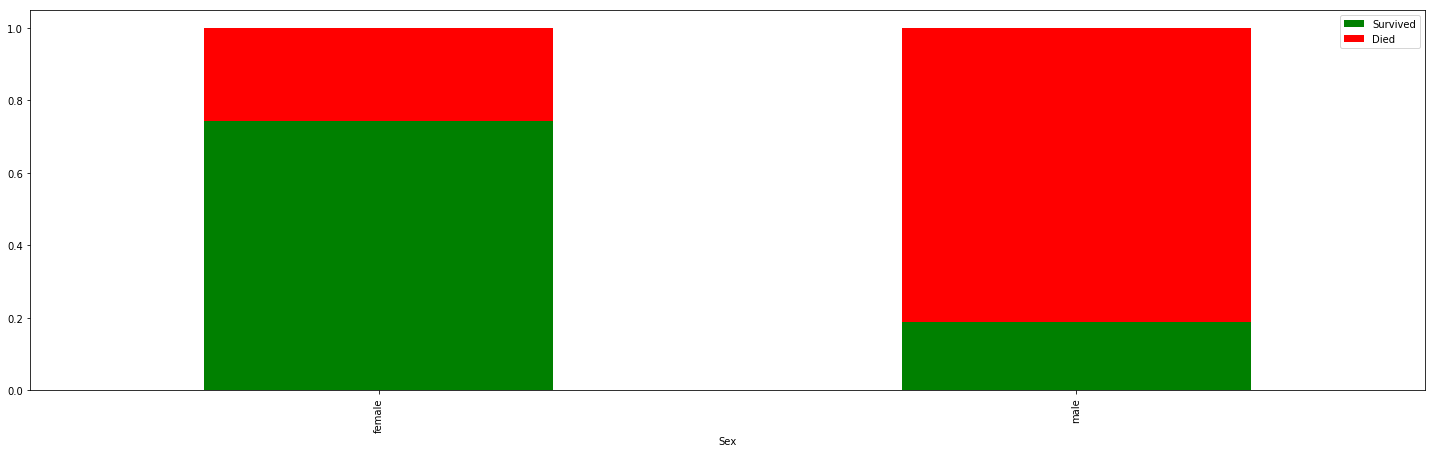

In [122]:
df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r'])

#females and kids obviously had higher chances of being rescued than men

/home/therochvoices/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


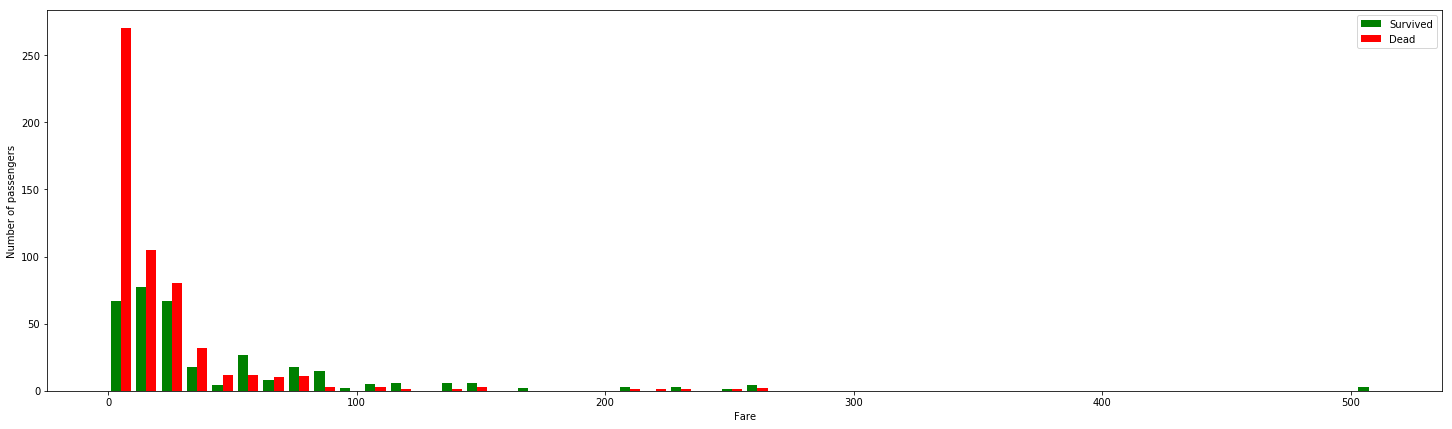

In [123]:
figure = plt.figure(figsize=(25, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], 
         stacked=False, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

#Rich survived more

In [124]:
x = df[['Age', 'Sex','Fare', 'SibSp', 'Parch']]
test_x = test[['Age', 'Sex','Fare', 'SibSp', 'Parch']]
test_x['Fare'].fillna(test_x['Fare'].median(), inplace=True)
pid = test['PassengerId']
y = df['Survived']
x['Sex'].replace(to_replace='male', value=0, inplace=True)
x['Sex'].replace(to_replace='female', value=1, inplace=True)
test_x['Sex'].replace(to_replace='male', value=0, inplace=True)
test_x['Sex'].replace(to_replace='female', value=1, inplace=True)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/therochvoices/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [125]:
#from sklearn.cross_validation import train_test_split
#train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .2) 

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [127]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
pred_y = random_forest.predict(test_x)


In [128]:
import csv
with open('predictions1.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['PassengerId', 'Survived'])
    for i, j in zip(pid, pred_y):
        filewriter.writerow([i, j])